In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ks-projects.csv')
df['year'] = pd.DatetimeIndex(df['launched']).year

# Data Cleansing

In [59]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015


In [4]:
df.iloc[0]

ID                                       1000002330
name                The Songs of Adelaide & Abullah
category                                     Poetry
main_category                            Publishing
currency                                        GBP
deadline                                  10/9/2015
goal                                           1000
launched                            8/11/2015 12:12
pledged                                           0
state                                        failed
backers                                           0
country                                          GB
usd pledged                                       0
usd_pledged_real                                  0
usd_goal_real                               1533.95
year                                           2015
Name: 0, dtype: object

# Insights

In [6]:
# Filtering all kickstarter projects to just US

kickstart_us = df[df['country'] == 'US']
kickstart_us.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.0,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.0,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.0,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.0,2015
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,50000.0,2/26/2016 13:38,52375.0,successful,224,US,52375.0,52375.0,50000.0,2016


In [7]:
# Filtering to all successful US projects and sort them by the most amount pledged

kickstart_us_successful = kickstart_us[kickstart_us['state'] == 'successful']
pledged_sorted = kickstart_us_successful.sort_values(['pledged'], ascending=False)
pledged_sorted.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,3/28/2015,500000.0,2/24/2015 15:44,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0,2015
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,8/30/2014,50000.0,7/8/2014 10:14,13285226.36,successful,62642,US,13285226.36,13285226.36,50000.0,2014
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,6/30/2016,1000000.0,5/24/2016 15:49,12779843.49,successful,66673,US,12779843.49,12779843.49,1000000.0,2016
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,1/8/2017,100000.0,11/25/2016 6:01,12393139.69,successful,19264,US,5228482.00,12393139.69,100000.0,2016
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,5/19/2012,100000.0,4/11/2012 6:59,10266845.74,successful,68929,US,10266845.74,10266845.74,100000.0,2012
293861,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,9/3/2015,20000.0,7/7/2015 13:52,9192055.66,successful,44949,US,9192055.66,9192055.66,20000.0,2015
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2/20/2015,10000.0,1/20/2015 19:00,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0,2015
6665,1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,8/9/2012,950000.0,7/10/2012 14:44,8596474.58,successful,63416,US,8596474.58,8596474.58,950000.0,2012
309630,647013276,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Tabletop Games,Games,USD,10/19/2017,40000.0,9/26/2017 20:00,7072757.00,successful,43733,US,1574139.50,7072757.00,40000.0,2017
271276,450099426,"The Everyday Backpack, Tote, and Sling",Product Design,Design,USD,9/10/2016,500000.0,7/13/2016 0:47,6565782.50,successful,26359,US,1462611.00,6565782.50,500000.0,2016


In [8]:
# Filtering to all successful US projects and sort them by the most backed projects

backers_sorted = kickstart_us_successful.sort_values(['backers'], ascending=False)
top10_backers = backers_sorted.head(10)
top10_backers

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2/20/2015,10000.0,1/20/2015 19:00,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0,2015
75900,1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,10/20/2016,15000.0,8/30/2016 22:02,6465690.30,successful,154926,US,13770.00,6465690.30,15000.0,2016
292244,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,7/2/2014,1000000.0,5/28/2014 15:05,5408916.95,successful,105857,US,5408916.95,5408916.95,1000000.0,2014
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,4/13/2013,2000000.0,3/13/2013 15:42,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.0,2013
182657,1929840910,Double Fine Adventure,Video Games,Games,USD,3/14/2012,400000.0,2/9/2012 2:52,3336371.92,successful,87142,US,3336371.92,3336371.92,400000.0,2012
23404,1118803016,Bears vs Babies - A Card Game,Tabletop Games,Games,USD,11/18/2016,10000.0,10/18/2016 18:59,3215679.79,successful,85581,US,1231455.60,3215679.79,10000.0,2016
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,3/28/2015,500000.0,2/24/2015 15:44,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0,2015
239175,286165030,Torment: Tides of Numenera,Video Games,Games,USD,4/6/2013,900000.0,3/6/2013 14:47,4188927.49,successful,74405,US,4188927.49,4188927.49,900000.0,2013
272924,458565935,Project Eternity,Video Games,Games,USD,10/17/2012,1100000.0,9/14/2012 19:01,3986929.49,successful,73986,US,3986929.49,3986929.49,1100000.0,2012
368573,947809001,Shenmue 3,Video Games,Games,USD,7/18/2015,2000000.0,6/16/2015 3:51,6333295.77,successful,69320,US,6333295.77,6333295.77,2000000.0,2015


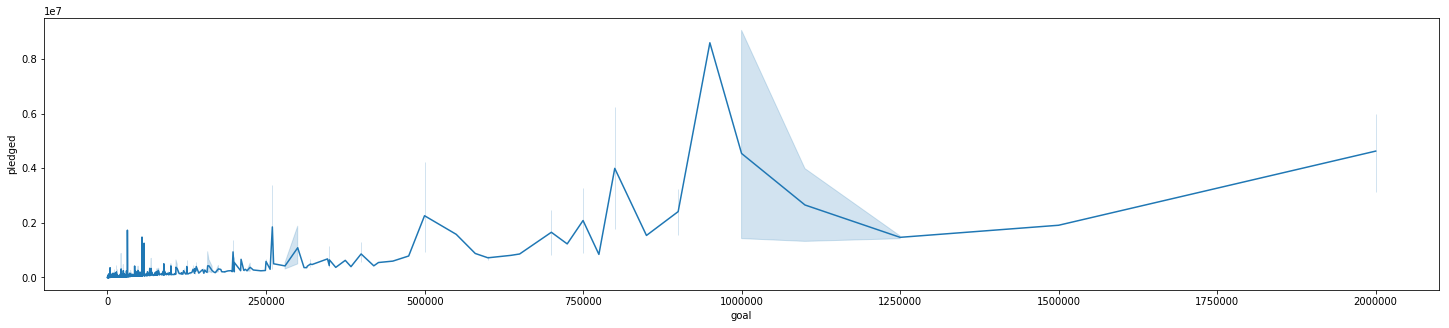

In [9]:
#Plotting the goal amount vs the pledged amount for successful US projects
plt.figure(figsize=(25, 5))
sns.lineplot(x='goal', y='pledged', data=kickstart_us_successful)
plt.show()

In [16]:
#Assign each year to a new variable and set index by year and country

df2012 = df[df['year'] == 2012]
df2012 = df2012.set_index(['year','country'])

df2013 = df[df['year'] == 2013]
df2013 = df2013.set_index(['year','country'])

df2014 = df[df['year'] == 2014]
df2014 = df2014.set_index(['year','country'])

df2015 = df[df['year'] == 2015]
df2015 = df2015.set_index(['year','country'])

df2016 = df[df['year'] == 2016]
df2016 = df2016.set_index(['year','country'])

df2017 = df[df['year'] == 2017]
df2017 = df2017.set_index(['year','country'])


In [25]:
#check the results
df2012

ID                                               name  \
year country                                                                  
2012 US       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
     US       1000070642                Mike Corey's Darkness & Light Album   
     US       1000071625                                           Boco Tea   
     US       1000131947                         Arrows & Sound Debut Album   
     US       1000146991             Help Scott Reynolds Make a New Record!   
     US       1000171141             The Please, Please Me: Studio Premiere   
     US       1000212914                       A Teacher's Travels in China   
     US       1000227361                                         UNDERWATER   
     US       1000332383                                  Road to the Shire   
     US       1000334074                              The Locals Only Shirt   
     US       1000344383  ¿Tu Sabes? (You Know?) a music collaboration b...   
     US       1000348776                 P/O/V Comic and Literary Anthology   
     US       1000354338  "Little Shop of Horrors" at the Browncoat Thea...   
     US         10003650          Glyscian Debut Album Recording (Canceled)   
     US       1000413719                      Backroads EP Processing Costs   
     US       1000445513                                       Bold Threadz   
     US       1000454605              Be part of the next SMB Project album   
     US       1000514796  CASE:Lynk - Your EMERGENCY iPhone Charge & Syn...   
     US       1000524949                              Operation: Make Stuff   
     US       1000535116              Xi3: Help us Usher in the Post-PC Era   
     US       1000553538                   URBNPOP / CHRIS HAMER SKETCHBOOK   
     US       1000567557                                     The Seven Rays   
     US       1000602156                                         HYDRA DICE   
     US       1000627718                Adele's Heart is Going to Edinburgh   
     GB       1000639526                                   Kaleidoscope Man   
     US       1000674477                "GENERATION FX" a documentary film.   
     GB       1000776914  VLC for the new Windows 8 User Experience ("Me...   
     US       1000827504                The JANIS JOPLIN Project (Canceled)   
     US       1000853310                                       Good Company   
     US       1000922108              Tugboat Collective's Inaugural Season   
...                  ...                                                ...   
     US         99828491        First Night Worcester rocks New Year's Eve!   
     US        998301361                                              Couch   
     US        998312721                                      Lounge Lizard   
     US         99835126              Prologue: From The Shelter Of My Mind   
     US        998371990                             Zilm: a game of reflex   
     US        998404193     The Precision Collection ? Writing Instruments   
     US        998467413          Lawless America...A Movie to Save America   
     US        998481547                                  Betcha Needa Logo   
     US        998508720                Peter & Company: the Animated Pilot   
     US        998516049           Help change the face of Brain Impairment   
     US        998529866  Visitors: A Long-Form Creative Nonfiction Project   
     US        998540700           Lindsey Pavao's First Full Length Album!   
     US        998628216                                       THE END GAME   
     US        998736061                        Me & The Single Married Man   
     US        998754211  Camels, Gifts and 3 Wise Men : Keeping Christ ...   
     US        998949767  Maxwell Hughes is gearing up for his 3rd full ...   
     US        998954734                         Teleported Film (Canceled)   
     US        998981870                             "Lyric Suite" for R

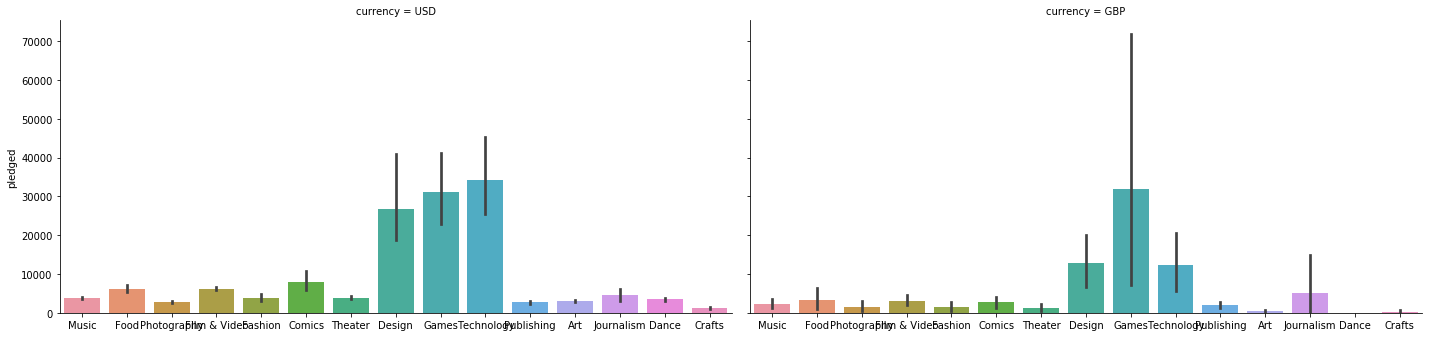

In [46]:
#Plotting each category to find out which projects accumulated the most money grouped by category in 2012

plt.figure(figsize=(30, 20))
fg = sns.catplot(x='main_category', y='pledged', 
                        col='currency', data=df2012, kind='bar', height = 5, aspect = 2)
fg.set_xlabels('')
plt.show()

In [49]:
df2017 = df2017.reset_index('country')
df2017.head(10)

,country,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
year,,,,,,,,,,,,,,,
2017,US,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.00,failed,15,100.00,2421.00,30000.00
2017,GB,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5/3/2017,5000.0,4/5/2017 19:44,94175.00,successful,761,57763.78,121857.33,6469.73
2017,AU,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,9/7/2017,2500.0,8/8/2017 1:20,1.00,failed,1,0.00,0.81,2026.10
2017,US,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,5/3/2017,50000.0,4/3/2017 17:11,57577.31,successful,840,10120.00,57577.31,50000.00
2017,CA,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,1/19/2018,3000.0,11/20/2017 18:15,592.00,live,24,185.65,472.88,2396.36
2017,US,1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,3/27/2017,1500.0,3/2/2017 4:01,856.00,failed,25,324.00,856.00,1500.00
2017,US,100020143,H2O The Underwater Portraits,People,Photography,USD,10/30/2017,9500.0,9/25/2017 17:17,6.00,failed,2,5.00,6.00,9500.00
2017,GB,1000256230,Shreddit - Privacy on Reddit,Software,Technology,GBP,7/2/2017,2000.0,6/2/2017 12:20,0.00,failed,0,0.00,0.00,2579.35
2017,IT,1000348690,The Silence of Hollowind - Urban Fantasy RPG,Tabletop Games,Games,EUR,11/23/2017,5000.0,10/24/2017 16:58,11238.00,successful,346,5509.51,13347.43,5938.52


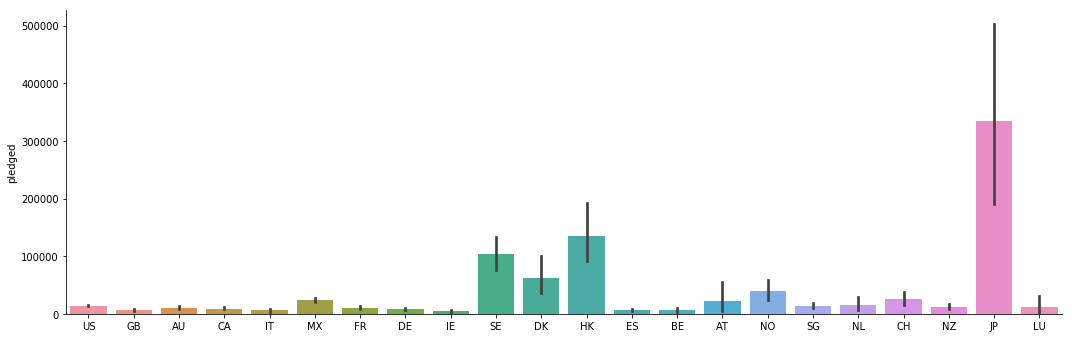

In [54]:
#Group by country and amount pledged to see which country had the most pledged and can do a deeper dive in 2017

plt.figure(figsize=(30, 20))
fg = sns.catplot(x='country', y='pledged', data=df2017, kind='bar', aspect = 3)
fg.set_xlabels('')
plt.show()

In [56]:
#Analyzing the most amount pledged in Japan during 2017

df2017_japan = df2017[df2017['country'] == 'JP']
df2017_pledged_sorted = df2017.sort_values(['pledged'], ascending=False)
df2017_pledged_sorted

,country,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
year,,,,,,,,,,,,,,,
2017,JP,330403282,MARUHI Cup & Saucer,Product Design,Design,JPY,10/15/2017,3000000.0,9/12/2017 16:00,1748630.0,failed,178,0.00,15451.36,26508.79
2017,JP,1535634515,PixelJunk™ Monsters Duo Mobile Game,Mobile Games,Games,JPY,12/20/2017,12000000.0,11/21/2017 16:02,1729241.0,failed,268,10262.99,15254.42,105857.45
2017,JP,836323367,Loper shoes : Innovation in terms of well-being.,Footwear,Fashion,JPY,12/4/2017,946870.0,11/4/2017 7:51,1266000.0,successful,118,5510.73,11155.17,8343.20
2017,JP,944152049,X-base | Wireless LED Lighting and Display System,DIY Electronics,Technology,JPY,12/3/2017,1000000.0,11/3/2017 0:42,1153367.0,successful,26,936.86,10162.72,8811.35
2017,JP,2067836254,DRESS UP BOX — Make-Believe Clothing for Girls,Childrenswear,Fashion,JPY,10/26/2017,1100000.0,9/26/2017 9:42,1121500.0,successful,45,752.91,9821.35,9633.07
2017,JP,1744962577,obniz - API managed IO,DIY Electronics,Technology,JPY,1/20/2018,1500000.0,12/21/2017 2:54,898250.0,live,150,2397.19,8082.88,13497.71
2017,JP,961962090,Rain Socks - The world's best rainwear for sne...,Product Design,Design,JPY,2/23/2018,1130000.0,12/26/2017 3:03,766240.0,live,197,3538.89,6894.99,10168.27
2017,JP,1212758464,Swaky: Ride A Snowboard Like a Snow Bike,Product Design,Design,JPY,10/27/2017,2000000.0,9/12/2017 16:00,669500.0,failed,25,0.00,5863.04,17514.67
2017,JP,1973657411,"""Order Land!"" English Version (Switch/STEAM/Xb...",Video Games,Games,JPY,11/12/2017,5000000.0,10/13/2017 3:56,513860.0,canceled,205,963.51,4563.18,44401.03


In [62]:
#which year had the most pledged amount
df.groupby('year').pledged.sum().plot(kind='bar')